# **Introduction to Pandas Library**

*Created by Dr. Bayazit Karaman*

*Content adopted from*

1.   https://pandas.pydata.org/docs/user_guide/10min.html
2.   https://pandas.pydata.org/docs/getting_started/overview.html





***What is Pandas?***

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.


The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

print(df)

#Each column in a Dataframe is a series
print(df["Age"])

ages = pd.Series([22, 55, 65], name="Age")
print(ages)

print(df["Age"].max())

print(ages.max())

df.describe()


                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female
0    22
1    35
2    58
Name: Age, dtype: int64
0    22
1    55
2    65
Name: Age, dtype: int64
58
65


,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


***How do I read and write tabular data?***

Pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame.

In [ ]:
titanic = pd.read_csv("sample_data/titanic.csv")

print(titanic.head(8))

print(titanic.tail(8))

print(titanic["Age"].mean())

#What is the median age and ticket fare price of the Titanic passengers?
titanic[["Age", "Fare"]].median()

titanic[["Age", "Fare"]].describe()

#specific combinations of aggregating statistics for given columns can be defined using the DataFrame.agg() method:

titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

#What is the average age for male versus female Titanic passengers?
titanic[["Sex", "Age"]].groupby("Sex").mean()

#What is the number of passengers in each of the cabin classes?
titanic["Pclass"].value_counts()

titanic.groupby("Pclass")["Pclass"].count()



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    mal

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

***How to reshape the layout of tables?***

In [ ]:
titanic.sort_values(by="Age").head(5)

titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


***Pivot Tables***

1.   Index: This specifies the row-level grouping.
2.   Column: This specifies the column level grouping.
3.   Values: These are the numerical values you are looking to summarize.





Survived     0     1
Sex                 
female    25.0  29.0
male      32.0  27.0


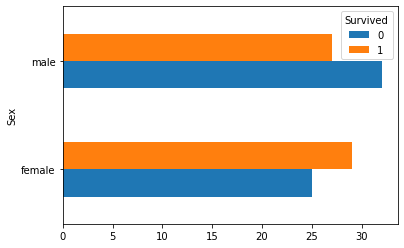

In [ ]:
myPivot = np.round(pd.pivot_table(titanic, values="Age", index = "Sex", columns = "Survived"))

print(myPivot)

myPivot.plot.barh()

***Slicing and Extracting Data in pandas***

In [ ]:
myData = titanic[["Age", "Sex", "Survived"]]

print(myData.head(5))


    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0
